<h1>Analysis</h1>

**<h3>GAN Components</h3>**  

   - **Generator (G)**: Takes random noise (latent vector *z*) and transforms it into data resembling the real data.
   - **Discriminator (D)**: Receives real data or generated data and outputs a probability indicating whether the input is real or fake.
   - **Adversarial Training**: *G* and *D* are trained simultaneously. *G* aims to produce data that *D* cannot distinguish from real data, while *D* aims to correctly classify real and fake data.


**<h3>Generator</h3>**  

The Generator transforms a random noise vector *z* into a data sample *G(z)*.
- **Input Noise (z)**: The starting point, a random noise vector.
- **Dense Layers with Activation Functions**: Layers that progressively transform the noise into data resembling real samples.
- **Output Layer**: Produces the generated data sample *G(z)*.



<h4>Visualization:</h4>

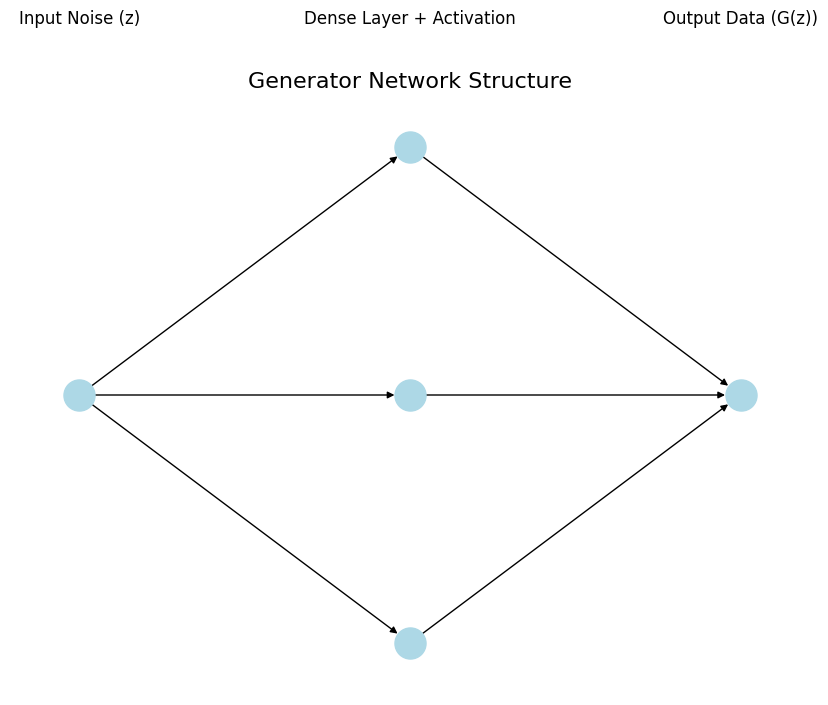

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_generator():
    G = nx.DiGraph()
    
    # Layers: Input Noise -> Hidden Layers -> Output Data
    layers = {
        'Input Noise (z)': 1,
        'Dense Layer + Activation': 3,
        'Output Data (G(z))': 1
    }
    
    pos = {}
    labels = {}
    node_id = 0
    layer_positions = {}
    
    # Position nodes
    x_offset = 0
    for layer_name, num_nodes in layers.items():
        y_offset = num_nodes / 2
        layer_positions[layer_name] = []
        for i in range(num_nodes):
            G.add_node(node_id)
            pos[node_id] = (x_offset, y_offset - i)
            labels[node_id] = ''
            layer_positions[layer_name].append(node_id)
            node_id += 1
        x_offset += 2

    # Connect nodes
    layers_list = list(layers.keys())
    for i in range(len(layers_list) - 1):
        layer1 = layers_list[i]
        layer2 = layers_list[i+1]
        for node1 in layer_positions[layer1]:
            for node2 in layer_positions[layer2]:
                G.add_edge(node1, node2)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, node_size=500, node_color='lightblue', arrows=True)
    
    # Annotations
    for layer_name, nodes in layer_positions.items():
        x = pos[nodes[0]][0]
        y = sum([pos[node][1] for node in nodes]) / len(nodes)
        plt.text(x, y + 1.5, layer_name, fontsize=12, ha='center')
    
    plt.title('Generator Network Structure', fontsize=16)
    plt.axis('off')
    plt.show()

visualize_generator()


<h4>Example Code:</h4>

- **Input Layer**:
  - Accepts a noise vector *z* of dimension *noise_dim* (e.g., 100).
  - Noise is sampled from a simple distribution (e.g., normal or uniform).
- **Hidden Layers**:
  - **Fully Connected Layers**: Increase the dimensionality gradually to transform the noise into a high-dimensional data space.
  - **LeakyReLU Activation**: Allows gradients to flow even when the unit is not active, improving learning.
  - **Batch Normalization**: Stabilizes training by normalizing inputs to each layer.
- **Output Layer**:
  - **Linear Transformation**: Maps to *data_dim* dimensions to match the real data.
  - **Tanh Activation**: Scales the output to be between -1 and 1, assuming the real data is scaled similarly.
- **Forward Method**:
  - Defines how the input noise *z* is transformed into generated data *data_gen*.


In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, noise_dim, data_dim):
        super(Generator, self).__init__()
        
        # Define the network architecture
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),           # Fully connected layer from noise_dim to 256 neurons
            nn.LeakyReLU(0.2, inplace=True),     # Activation function
            nn.Linear(256, 512),                 # Fully connected layer
            nn.BatchNorm1d(512),                 # Batch normalization for stable training
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, data_dim),           # Output layer matching data dimension
            nn.Tanh()                            # Output activation to scale outputs between -1 and 1
        )
    
    def forward(self, z):
        """
        Forward pass through the generator.

        Parameters:
        - z (torch.Tensor): Random noise tensor of shape (batch_size, noise_dim)

        Returns:
        - data_gen (torch.Tensor): Generated data tensor of shape (batch_size, data_dim)
        """
        data_gen = self.model(z)
        return data_gen

**<h3>Discriminator</h3>**  

The Discriminator acts as a binary classifier to distinguish between real and fake data.
- **Input Data (x or G(z))**: Receives either real data samples or generated data samples.
- **Dense Layers with Activation Functions**: Layers that process the input data.
- **Output Layer**: Produces a probability *D(x)*, indicating how likely the input is real.


<h4>Visualization:</h4>

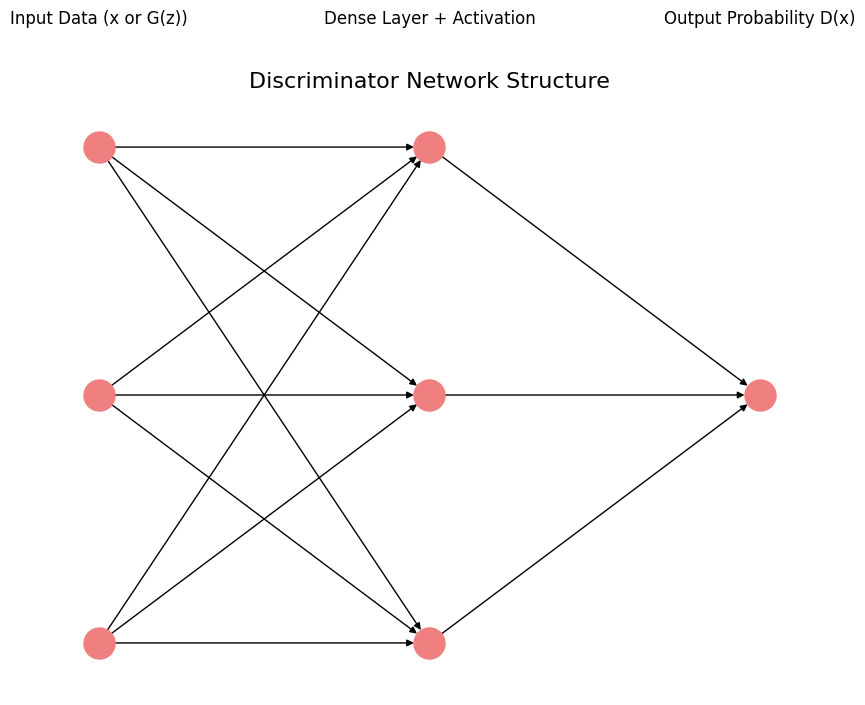

In [2]:
def visualize_discriminator():
    G = nx.DiGraph()
    
    # Layers: Input Data -> Hidden Layers -> Output Probability
    layers = {
        'Input Data (x or G(z))': 3,
        'Dense Layer + Activation': 3,
        'Output Probability D(x)': 1
    }
    
    pos = {}
    labels = {}
    node_id = 0
    layer_positions = {}
    
    # Position nodes
    x_offset = 0
    for layer_name, num_nodes in layers.items():
        y_offset = num_nodes / 2
        layer_positions[layer_name] = []
        for i in range(num_nodes):
            G.add_node(node_id)
            pos[node_id] = (x_offset, y_offset - i)
            labels[node_id] = ''
            layer_positions[layer_name].append(node_id)
            node_id += 1
        x_offset += 2

    # Connect nodes
    layers_list = list(layers.keys())
    for i in range(len(layers_list) - 1):
        layer1 = layers_list[i]
        layer2 = layers_list[i+1]
        for node1 in layer_positions[layer1]:
            for node2 in layer_positions[layer2]:
                G.add_edge(node1, node2)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, node_size=500, node_color='lightcoral', arrows=True)
    
    # Annotations
    for layer_name, nodes in layer_positions.items():
        x = pos[nodes[0]][0]
        y = sum([pos[node][1] for node in nodes]) / len(nodes)
        plt.text(x, y + 1.5, layer_name, fontsize=12, ha='center')
    
    plt.title('Discriminator Network Structure', fontsize=16)
    plt.axis('off')
    plt.show()

visualize_discriminator()


<h4>Example Code:</h4>

- **Input Layer**:
  - Accepts a data vector *x* of dimension *data_dim* (e.g., 784 for MNIST images).
- **Hidden Layers**:
  - **Fully Connected Layers**: Reduce dimensionality to capture key features for classification.
  - **LeakyReLU Activation**: Helps in learning nonlinear relationships.
  - **Dropout Layers**: Prevent overfitting by randomly dropping units during training.
- **Output Layer**:
  - **Linear Transformation**: Maps to a single value.
  - **Sigmoid Activation**: Produces a probability between 0 and 1, representing the likelihood that the input is real.
- **Forward Method**:
  - Processes the input data *x* and outputs a probability *validity*.

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, data_dim):
        super(Discriminator, self).__init__()
        
        # Define the network architecture
        self.model = nn.Sequential(
            nn.Linear(data_dim, 1024),           # Fully connected layer from data_dim to 1024 neurons
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),                     # Dropout for regularization
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),                   # Output layer producing a single value
            nn.Sigmoid()                         # Output activation to produce probability between 0 and 1
        )
    
    def forward(self, x):
        """
        Forward pass through the discriminator.

        Parameters:
        - x (torch.Tensor): Data tensor of shape (batch_size, data_dim)

        Returns:
        - validity (torch.Tensor): Probability tensor of shape (batch_size, 1)
        """
        validity = self.model(x)
        return validity


**<h3>Training the Discriminator</h3>**  

The Discriminator is trained to distinguish real data from fake data generated by the Generator.
- **Real Data Flow**:
  - Real data samples (*x*) are fed into *D*.
  - *D* aims to output probabilities close to 1 for real data.
- **Fake Data Flow**:
  - Generated data samples (*G(z)*) are also fed into *D*.
  - *D* aims to output probabilities close to 0 for fake data.
- **Discriminator's Objective**:
  - Maximize *log(D(x)) + log(1 - D(G(z)))*.
  - Improves *D*'s ability to correctly classify real and fake samples.


<h4>Visualization:</h4>

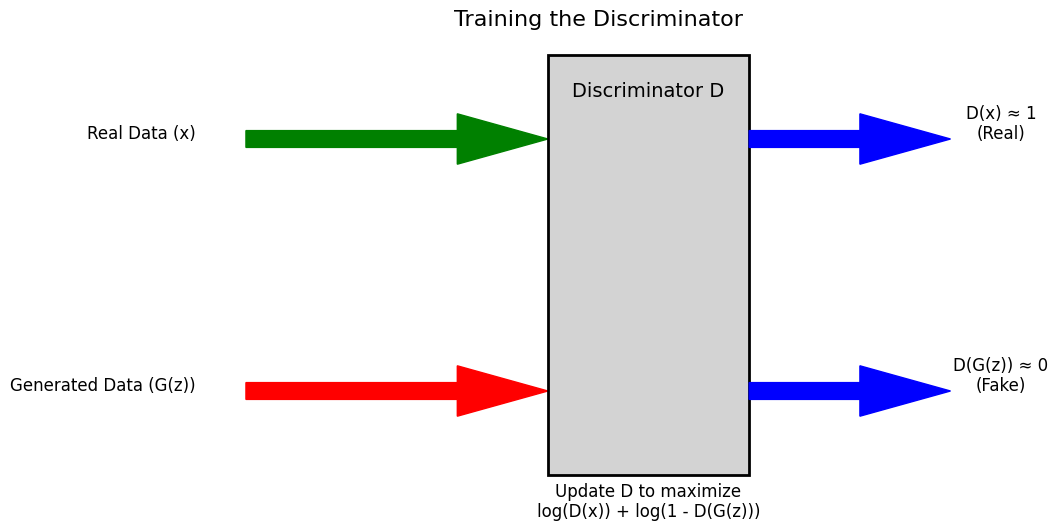

In [3]:
import matplotlib.pyplot as plt

def visualize_discriminator_training():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot real data flow
    ax.arrow(0.1, 0.65, 0.3, 0, width=0.02, color='green', length_includes_head=True)
    ax.text(0.05, 0.65, 'Real Data (x)', fontsize=12, ha='right')
    
    # Plot fake data flow
    ax.arrow(0.1, 0.35, 0.3, 0, width=0.02, color='red', length_includes_head=True)
    ax.text(0.05, 0.35, 'Generated Data (G(z))', fontsize=12, ha='right')
    
    # Discriminator block
    ax.add_patch(plt.Rectangle((0.4, 0.25), 0.2, 0.5, edgecolor='black', facecolor='lightgray', lw=2))
    ax.text(0.5, 0.7, 'Discriminator D', fontsize=14, ha='center')
    
    # Output arrows and labels
    ax.arrow(0.6, 0.65, 0.2, 0, width=0.02, color='blue', length_includes_head=True)
    ax.text(0.85, 0.65, 'D(x) ≈ 1\n(Real)', fontsize=12, ha='center')
    
    ax.arrow(0.6, 0.35, 0.2, 0, width=0.02, color='blue', length_includes_head=True)
    ax.text(0.85, 0.35, 'D(G(z)) ≈ 0\n(Fake)', fontsize=12, ha='center')
    
    # Loss function text below the box
    ax.text(0.5, 0.2, 'Update D to maximize\nlog(D(x)) + log(1 - D(G(z)))', fontsize=12, ha='center')
    
    ax.axis('off')
    plt.title('Training the Discriminator', fontsize=16)
    plt.show()

visualize_discriminator_training()


<h4>Example Code:</h4>

- **Zero Gradients**: Clears previous gradients to prevent accumulation.
- **Labels**: Creates labels for real (valid = 1) and fake (fake = 0) data.
- **Real Loss**: Computes loss on real data, expecting *D* to output 1.
- **Fake Loss**: Computes loss on generated data, expecting *D* to output 0.
- **Detach**: *generated_data.detach()* ensures gradients do not flow back into *G* when training *D*.
- **Backward Pass and Optimization**: Computes gradients and updates *D*'s parameters.

In [ ]:
adversarial_loss = nn.BCELoss()

def train_discriminator(optimizer_D, real_data, generated_data):
    optimizer_D.zero_grad()
    
    # Labels for real and fake data
    valid = torch.ones(real_data.size(0), 1, device=device)
    fake = torch.zeros(generated_data.size(0), 1, device=device)
    
    # Loss for real data
    real_loss = adversarial_loss(discriminator(real_data), valid)
    
    # Loss for fake data
    fake_loss = adversarial_loss(discriminator(generated_data.detach()), fake)
    
    # Total loss and optimization step
    d_loss = real_loss + fake_loss
    d_loss.backward()
    optimizer_D.step()
    
    return d_loss.item()

**<h3>Training the Generator</h3>**  

The Generator is trained to produce data that fools the Discriminator.

- **Noise Input**:
  - Random noise (*z*) is fed into *G*.
- **Generated Data Flow**:
  - *G* produces *G(z)*, which is fed into *D*.
- **Discriminator's Evaluation**:
  - *D* outputs *D(G(z))*, the probability that *G(z)* is real.
- **Generator's Objective**:
  - Minimize *log(1 - D(G(z)))*.
  - Alternatively, maximize *log(D(G(z)))* to provide stronger gradients.
- **Goal**:
  - Train *G* to generate data that *D* classifies as real (outputs close to 1).


<h4>Visualization:</h4>

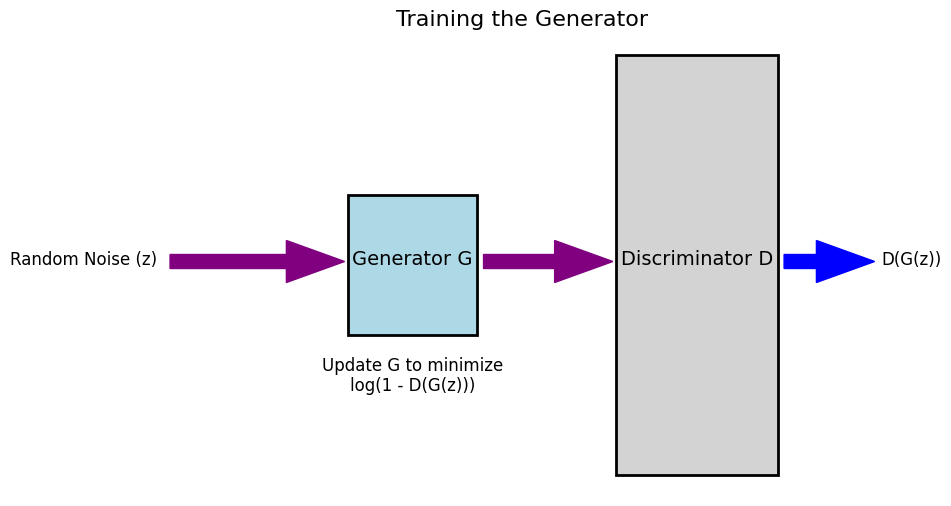

In [4]:
import matplotlib.pyplot as plt

def visualize_generator_training():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Noise input
    ax.arrow(0.07, 0.505, 0.27, 0, width=0.02, color='purple', length_includes_head=True)
    ax.text(0.05, 0.5, 'Random Noise (z)', fontsize=12, ha='right')
    
    # Generator block
    ax.add_patch(plt.Rectangle((0.345, 0.4), 0.2, 0.2, edgecolor='black', facecolor='lightblue', lw=2))
    ax.text(0.445, 0.5, 'Generator G', fontsize=14, ha='center')
    
    # Generated data to Discriminator
    ax.arrow(0.555, 0.505, 0.2, 0, width=0.02, color='purple', length_includes_head=True)
    
    # Discriminator Block
    ax.add_patch(plt.Rectangle((0.76, 0.2), 0.25, 0.6, edgecolor='black', facecolor='lightgray', lw=2))
    ax.text(0.885, 0.5, 'Discriminator D', fontsize=14, ha='center')
    
    # Blue output arrow
    ax.arrow(1.02, 0.505, 0.14, 0, width=0.02, color='blue', length_includes_head=True)
    ax.text(1.17, 0.5, 'D(G(z))', fontsize=12, ha='left')
    
    #Text
    ax.text(0.445, 0.32, 'Update G to minimize\nlog(1 - D(G(z)))', fontsize=12, ha='center')
    
    ax.axis('off')
    plt.title('Training the Generator', fontsize=16)
    plt.show()

visualize_generator_training()

<h4>Example Code:</h4>

- **Zero Gradients**: Clears previous gradients.
- **Labels**: Uses valid labels (1) to trick *D* into thinking generated data is real.
- **Loss**: Computes loss based on *D*'s prediction of generated data.
- **Backward Pass and Optimization**: Computes gradients and updates *G*'s parameters.

In [ ]:
def train_generator(optimizer_G, generated_data):
    optimizer_G.zero_grad()
    
    # Labels for the generator to aim for
    valid = torch.ones(generated_data.size(0), 1, device=device)
    
    # Loss based on D's output
    g_loss = adversarial_loss(discriminator(generated_data), valid)
    
    # Backward pass and optimization
    g_loss.backward()
    optimizer_G.step()
    
    return g_loss.item()

<h1>Synthesis</h1>

**<h3>Iterative Training Process</h3>**  

The training involves alternating between training D and G.
- **Alternating Steps**:
  - **Step 1**: Train *D* using both real data and fake data from *G*.
  - **Step 2**: Train *G* using feedback from *D*.
- **Iteration**:
  - The process repeats, allowing both networks to improve over time.
- **Interaction Between D and G**:
  - *G* improves to produce more realistic data.
  - *D* improves to better distinguish real from fake data.


<h4>Visualization:</h4>

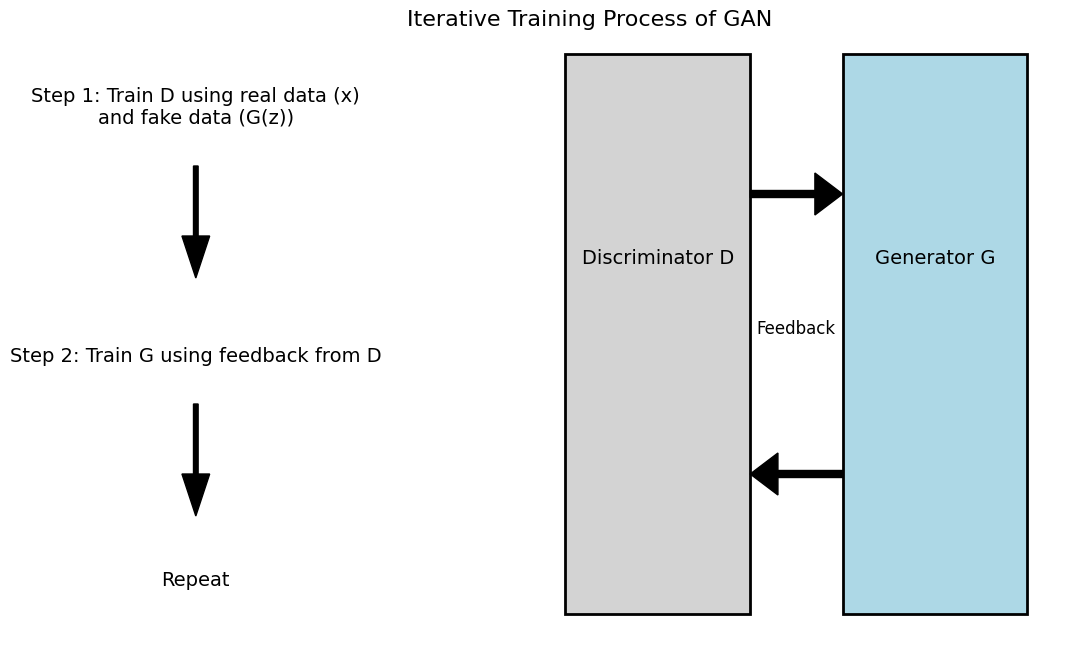

In [5]:
import matplotlib.pyplot as plt

def visualize_iterative_training():
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Title
    plt.suptitle('Iterative Training Process of GAN', fontsize=16, y=0.9)
    
    # Step 1: Train D
    ax.text(0.1, 0.65, 'Step 1: Train D using real data (x)\nand fake data (G(z))', fontsize=14, ha='center')
    ax.arrow(0.1, 0.62, 0, -0.08, width=0.005, head_width=0.03, head_length=0.03, color='black', length_includes_head=True)
    
    # Step 2: Train G
    ax.text(0.1, 0.48, 'Step 2: Train G using feedback from D', fontsize=14, ha='center')
    ax.arrow(0.1, 0.45, 0, -0.08, width=0.005, head_width=0.03, head_length=0.03, color='black', length_includes_head=True)
    
    # Repeat text
    ax.text(0.1, 0.32, 'Repeat', fontsize=14, ha='center')
    
    # Discriminator block on the right
    ax.add_patch(plt.Rectangle((0.5, 0.3), 0.2, 0.4, edgecolor='black', facecolor='lightgray', lw=2))
    ax.text(0.6, 0.55, 'Discriminator D', fontsize=14, ha='center')
    
    # Generator block on the right
    ax.add_patch(plt.Rectangle((0.8, 0.3), 0.2, 0.4, edgecolor='black', facecolor='lightblue', lw=2))
    ax.text(0.9, 0.55, 'Generator G', fontsize=14, ha='center')
    
    # Feedback arrows with centered text
    ax.arrow(0.7, 0.6, 0.1, 0, width=0.005, head_width=0.03, head_length=0.03, color='black', length_includes_head=True)
    ax.arrow(0.8, 0.4, -0.1, 0, width=0.005, head_width=0.03, head_length=0.03, color='black', length_includes_head=True)
    ax.text(0.75, 0.5, 'Feedback', fontsize=12, ha='center')
    
    ax.axis('off')
    plt.show()

visualize_iterative_training()


**<h3>Convergence</h3>**

Achieving a balance between G and D is crucial for successful GAN training.
- **Performance Metrics**:
  - **D Accuracy**: The ability of *D* to correctly classify real and fake data.
  - **G Fooling Rate**: The rate at which *G*'s data fools *D*.
- **Convergence Point**:
  - Both *D* accuracy and *G* fooling rate stabilize around 50%.
  - Indicates *D* cannot distinguish between real and fake data better than random guessing.
- **Balance**:
  - A well-balanced GAN leads to *G* generating realistic data and *D* being unable to tell it apart from real data.


<h4>Visualization:</h4>

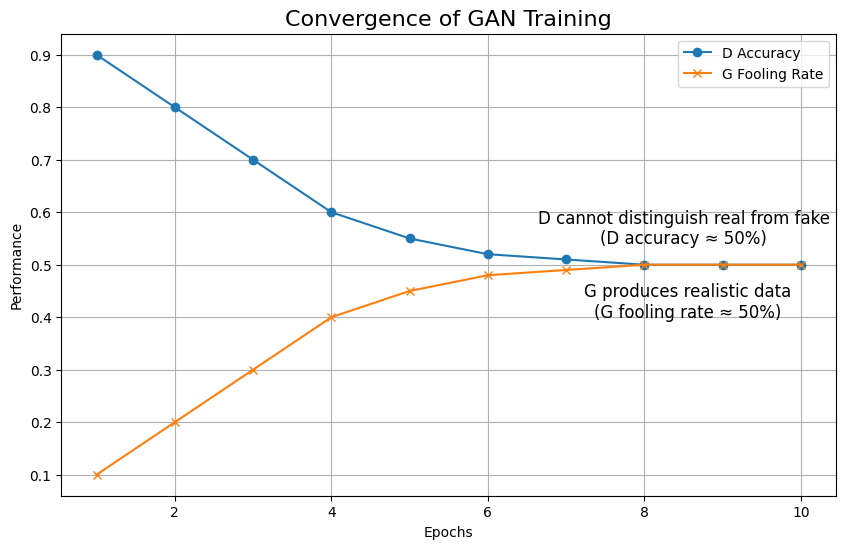

In [6]:
def visualize_convergence():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot G and D performance over time
    epochs = list(range(1, 11))
    d_performance = [0.9, 0.8, 0.7, 0.6, 0.55, 0.52, 0.51, 0.5, 0.5, 0.5]
    g_performance = [0.1, 0.2, 0.3, 0.4, 0.45, 0.48, 0.49, 0.5, 0.5, 0.5]
    
    ax.plot(epochs, d_performance, label='D Accuracy', marker='o')
    ax.plot(epochs, g_performance, label='G Fooling Rate', marker='x')
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Performance')
    ax.set_title('Convergence of GAN Training', fontsize=16)
    ax.legend()
    ax.grid(True)
    
    # Annotations
    ax.text(8.5, 0.54, 'D cannot distinguish real from fake\n(D accuracy ≈ 50%)', fontsize=12, ha='center')
    ax.text(8.55, 0.4, 'G produces realistic data\n(G fooling rate ≈ 50%)', fontsize=12, ha='center')
    
    plt.show()

visualize_convergence()


<h4>Initialization Code:</h4>

- **Hyperparameters**:
  - **noise_dim**: Size of the input noise vector for *G*.
  - **data_dim**: Size of the data samples (flattened if necessary).
  - **batch_size**: Number of samples per batch.
  - **lr**: Learning rate for both optimizers.
- **Device Configuration**:
  - Utilizes GPU if available for faster computation.
- **Network Initialization**:
  - Instantiates *G* and *D*, moving them to the appropriate device.
- **Optimizers**:
  - Uses Adam optimizer, which adapts the learning rate for each parameter.
  - **betas**: Hyperparameters for the Adam optimizer; commonly set as (0.5, 0.999) in GANs.


In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Hyperparameters
noise_dim = 100            # Dimensionality of the noise input to the Generator
data_dim = 28 * 28         # Dimensionality of the data (e.g., 28x28 images)
batch_size = 64
lr = 0.0002                # Learning rate for optimizers
num_epochs = 50

# Device configuration (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize networks
generator = Generator(noise_dim, data_dim).to(device)
discriminator = Discriminator(data_dim).to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

<h4>Training Loop Code:</h4>

- **Data Loading**:
  - Loads the MNIST dataset and applies transformations.
  - Data is normalized to the range [-1, 1] to match the output of *G*.
- **Epoch Loop**:
  - Iterates over the number of epochs specified.
- **Batch Loop**:
  - Iterates over each batch in the dataset.
- **Prepare Real Data**:
  - Reshapes and moves data to the appropriate device.
- **Train Discriminator**:
  - Generates fake data by passing random noise through *G*.
  - Calls *train_discriminator* function to update *D*.
- **Train Generator**:
  - Generates another batch of fake data.
  - Calls *train_generator* function to update *G*.


In [ ]:
# Loss function
adversarial_loss = nn.BCELoss()

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalizes data to [-1, 1]
])

# Load dataset (e.g., MNIST)
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training Loop
for epoch in range(num_epochs):
    for i, (real_data, _) in enumerate(dataloader):
        # Prepare real data
        real_data = real_data.view(real_data.size(0), -1).to(device)  # Flatten and move to device

        # ---------------------
        #  Train Discriminator
        # ---------------------
        # Generate fake data
        z = torch.randn(real_data.size(0), noise_dim, device=device)
        generated_data = generator(z)

        # Train Discriminator
        d_loss = train_discriminator(optimizer_D, real_data, generated_data)

        # -----------------
        #  Train Generator
        # -----------------
        # Generate fake data (again)
        z = torch.randn(real_data.size(0), noise_dim, device=device)
        generated_data = generator(z)

        # Train Generator
        g_loss = train_generator(optimizer_G, generated_data)

        # Print training progress
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(dataloader)} \
                  Loss D: {d_loss:.4f}, loss G: {g_loss:.4f}")